In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

import pickle

In [2]:
df = pd.read_csv('datasets/p1z.csv').drop(['Unnamed: 0'], axis=1)
df.head(10)

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,gesture
0,0.557007,0.818380,-1.402221e-07,0.533844,0.807948,-0.013054,0.518483,0.784112,-0.022051,0.516952,...,0.578329,0.755628,-0.036279,0.569145,0.778225,-0.033187,0.563674,0.786244,-0.027492,RightIndexExtended
1,0.556453,0.817928,-1.355417e-07,0.533192,0.807721,-0.012867,0.517826,0.784252,-0.022033,0.516570,...,0.576979,0.755731,-0.036258,0.567646,0.777365,-0.032986,0.562199,0.785344,-0.027215,RightIndexExtended
2,0.556143,0.818267,-1.323524e-07,0.533082,0.807373,-0.012597,0.518027,0.783881,-0.021483,0.516841,...,0.576355,0.756964,-0.035861,0.566996,0.778610,-0.032916,0.561500,0.787286,-0.027354,RightIndexExtended
3,0.555767,0.818695,-1.507060e-07,0.533051,0.808627,-0.012900,0.517367,0.785632,-0.022078,0.515604,...,0.577151,0.758788,-0.037497,0.566721,0.781247,-0.034382,0.560495,0.789517,-0.028730,RightIndexExtended
4,0.556594,0.818269,-1.391468e-07,0.533063,0.807880,-0.011843,0.517516,0.784617,-0.020444,0.516228,...,0.574808,0.756816,-0.035289,0.566043,0.778099,-0.031623,0.561359,0.785286,-0.025662,RightIndexExtended
5,0.553114,0.822046,-1.500118e-07,0.530073,0.812050,-0.011775,0.515534,0.788155,-0.020329,0.515464,...,0.574560,0.760834,-0.036202,0.564464,0.783322,-0.032263,0.558980,0.790892,-0.026042,RightIndexExtended
6,0.551984,0.833117,-1.491250e-07,0.529760,0.823667,-0.013106,0.514638,0.800060,-0.022341,0.514030,...,0.575827,0.774787,-0.039873,0.566578,0.797241,-0.035841,0.562719,0.804168,-0.029540,RightIndexExtended
7,0.553248,0.836382,-1.539127e-07,0.530480,0.826793,-0.013821,0.514576,0.804015,-0.023851,0.513924,...,0.577023,0.778279,-0.041838,0.568130,0.801330,-0.037603,0.565093,0.807355,-0.031106,RightIndexExtended
8,0.557370,0.851014,-1.670577e-07,0.534323,0.839594,-0.015166,0.518370,0.817355,-0.026637,0.517369,...,0.585044,0.792041,-0.045404,0.574862,0.815334,-0.041956,0.569811,0.823162,-0.035893,RightIndexExtended
9,0.563033,0.856114,-1.469460e-07,0.537668,0.843490,-0.015275,0.519999,0.820168,-0.027261,0.520042,...,0.592369,0.795393,-0.045937,0.581212,0.819584,-0.041451,0.575025,0.827156,-0.034872,RightIndexExtended


In [3]:
X = df.drop('gesture', axis=1, inplace=False)
Y = df['gesture']
# Testing overfitting with 90% test size
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  4186
Ejemplos usados para test:  1047


### Model training

In [15]:
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))

Accuracy of K-NN classifier on training set: 0.99


In [16]:
pred = knn.predict(x_test)

<AxesSubplot: >

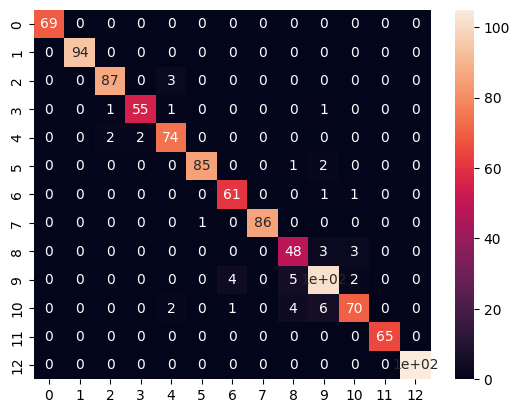

In [17]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [18]:
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

   ExtendedHandEnd       1.00      1.00      1.00        69
 ExtendedHandStart       1.00      1.00      1.00        94
   LeftIndexClosed       0.97      0.97      0.97        90
 LeftIndexExtended       0.96      0.95      0.96        58
     LeftIndexHook       0.93      0.95      0.94        78
              None       0.99      0.97      0.98        88
           PinchIn       0.92      0.97      0.95        63
          PinchOut       1.00      0.99      0.99        87
  RightIndexClosed       0.83      0.89      0.86        54
RightIndexExtended       0.89      0.90      0.89       113
    RightIndexHook       0.92      0.84      0.88        83
         ThumbDown       1.00      1.00      1.00        65
           ThumbUp       1.00      1.00      1.00       105

          accuracy                           0.96      1047
         macro avg       0.95      0.96      0.95      1047
      weighted avg       0.96      0.9

In [19]:
with open('models/knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()

### Elbow Method

In [9]:
test_error_rates = []

for k in range(2,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train) 
   
    y_pred = knn_model.predict(x_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

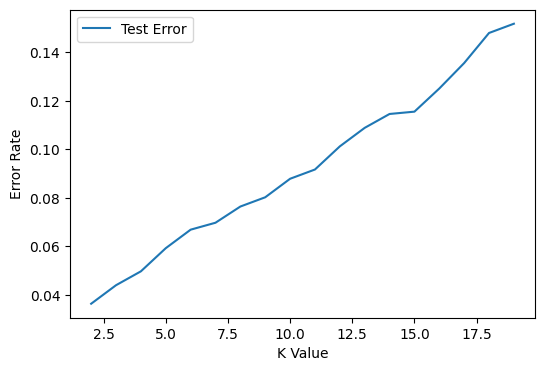

In [10]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")